In [2]:
import pandas as pd

# Load the Excel file
file_path = '/content/datafile.xlsx'
xls = pd.ExcelFile(file_path)

# Load the necessary sheets
days_breakdown = pd.read_excel(xls, sheet_name='Days-breakdown')
data_at_admission = pd.read_excel(xls, sheet_name='Data-at-admission')
hlos = pd.read_excel(xls, sheet_name='Hospital-length-of-stay')

# Merge "Days-breakdown" with "Data-at-admission" to get age, sex, height, weight, and comorbidities
merged_data = pd.merge(days_breakdown,
                       data_at_admission[['id', 'age', 'sex', 'height', 'weight', 'comorbidities']],
                       left_on='parent_id', right_on='id', how='inner')

# Merge with "Hospital-length-of-stay" to get the HLOS and adjust per day (HLOS - day)
merged_data = pd.merge(merged_data, hlos[['parent_id', 'hospital_length_of_stay']],
                       on='parent_id', how='inner')

# Create the adjusted HLOS (HLOS - day)
merged_data['adjusted_hlos'] = merged_data['hospital_length_of_stay'] - merged_data['day']

# Drop rows where adjusted HLOS is less than or equal to zero
processed_data = merged_data[merged_data['adjusted_hlos'] > 0]

# Select the required features
required_features = [
    'age', 'sex', 'height', 'weight', 'comorbidities',
    'systolic_blood_pressure', 'diastolic_blood_pressure', 'heart_rate',
    'respiratory_rate', 'oxygen_saturation', 'temperature',
    'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch', 'mchc', 'rdw',
    'platelet_count', 'aptt_aptr', 'pt', 'alt', 'ast', 'serum_creatinine',
    'sodium', 'potassium', 'total_serum_bilirubin', 'lactate', 'pao2', 'pao2_fio2',
    'ph', 'ferritin', 'd_dimer', 'crp', 'hs_crp', 'intubated',
    'adjusted_hlos'  # The target variable
]

# Filter the data to include only these features
processed_data = processed_data[required_features]

# Display the first few rows of the preprocessed data
processed_data.head()

# Save the preprocessed data to a CSV file (optional)
# processed_data.to_csv('preprocessed_data.csv', index=False)

,age,sex,height,weight,comorbidities,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,...,lactate,pao2,pao2_fio2,ph,ferritin,d_dimer,crp,hs_crp,intubated,adjusted_hlos
0,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",119.0,54.0,79.0,18.0,94.0,...,NaN,NaN,NaN,NaN,921.0,NaN,NaN,NaN,No,20
1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",133.0,64.0,73.0,18.0,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,19
2,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",140.0,74.0,70.0,20.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,18
3,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",154.0,78.0,77.0,18.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,17
4,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",155.0,61.0,64.0,16.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,16


In [3]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2895 entries, 0 to 4059
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2895 non-null   int64  
 1   sex                       2895 non-null   object 
 2   height                    1691 non-null   float64
 3   weight                    2182 non-null   float64
 4   comorbidities             2895 non-null   object 
 5   systolic_blood_pressure   2872 non-null   float64
 6   diastolic_blood_pressure  2872 non-null   float64
 7   heart_rate                2888 non-null   float64
 8   respiratory_rate          2887 non-null   float64
 9   oxygen_saturation         2887 non-null   float64
 10  temperature               2888 non-null   float64
 11  wbc                       1655 non-null   float64
 12  rbc                       1655 non-null   float64
 13  hemoglobin                1655 non-null   float64
 14  hematocrit   

In [4]:
merged_data

,id_x,parent_id,day,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,highest_mean_arterial_pressure,...,anticoagulation,steroid,id_y,age,sex,height,weight,comorbidities,hospital_length_of_stay,adjusted_hlos
0,1,1,1,119.0,54.0,79.0,18.0,94.0,37.2,85.0,...,Yes,No,1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",21,20
1,2,1,2,133.0,64.0,73.0,18.0,98.0,37.1,NaN,...,Yes,Yes,1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",21,19
2,3,1,3,140.0,74.0,70.0,20.0,95.0,37.5,NaN,...,Yes,Yes,1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",21,18
3,4,1,4,154.0,78.0,77.0,18.0,95.0,37.1,NaN,...,Yes,Yes,1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",21,17
4,5,1,5,155.0,61.0,64.0,16.0,92.0,36.7,NaN,...,Yes,Yes,1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",21,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,4260,522,4,98.0,73.0,82.0,24.0,95.0,36.1,NaN,...,Yes,No,522,73,Male,NaN,NaN,"""[]""",5,1
4060,4261,522,5,110.0,64.0,68.0,18.0,95.0,36.5,NaN,...,Yes,No,522,73,Male,NaN,NaN,"""[]""",5,0
4061,4262,522,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,522,73,Male,NaN,NaN,"""[]""",5,-1
4062,4263,522,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,522,73,Male,NaN,NaN,"""[]""",5,-2


In [5]:
# import pandas as pd
import numpy as np

# Load the preprocessed data (you can replace this with the file you saved earlier)
# processed_data = pd.read_csv('preprocessed_data.csv')

# Step 1: Dropping columns with less than 30% non-missing values
threshold = 0.3 * len(processed_data)
columns_to_drop = processed_data.columns[processed_data.isnull().sum() > threshold]

# Drop columns with insufficient data
cleaned_data = processed_data.drop(columns=columns_to_drop)

# Step 2: Handle missing values for the remaining columns
# For numerical columns, fill with the median
num_cols = cleaned_data.select_dtypes(include=[np.number]).columns
cleaned_data[num_cols] = cleaned_data[num_cols].apply(lambda col: col.fillna(col.median()), axis=0)

# For categorical columns, fill with the most frequent value
cat_cols = cleaned_data.select_dtypes(include=[object]).columns
cleaned_data[cat_cols] = cleaned_data[cat_cols].apply(lambda col: col.fillna(col.mode()[0]), axis=0)

# Display the cleaned dataset
cleaned_data.head()

# Save the cleaned data to a CSV file
# cleaned_data.to_csv('cleaned_data.csv', index=False)

,age,sex,weight,comorbidities,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,intubated,adjusted_hlos
0,74,Male,77.0,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",119.0,54.0,79.0,18.0,94.0,37.2,No,20
1,74,Male,77.0,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",133.0,64.0,73.0,18.0,98.0,37.1,No,19
2,74,Male,77.0,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",140.0,74.0,70.0,20.0,95.0,37.5,No,18
3,74,Male,77.0,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",154.0,78.0,77.0,18.0,95.0,37.1,No,17
4,74,Male,77.0,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",155.0,61.0,64.0,16.0,92.0,36.7,No,16


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
merged_data

,id_x,parent_id,day,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,highest_mean_arterial_pressure,lowest_mean_arterial_pressure,highest_heart_rate,lowest_heart_rate,highest_creatinine,lowest_urine_output,highest_gcs,lowest_gcs,intubated,highest_ph,lowest_ph,cardiac_arrest,arrested_time,major_cardiac_events,clinically_diagnosed_infections,mechanical_ventilation,number_of_vasoactive_agents,antiarrhythmic_therapies,renal_replacement_therapy_dialysis,cardiovascular_mechanical_support,fluid_balance,wbc,rbc,hemoglobin,hematocrit,platelet_count,aptt_aptr,pt,alt,ast,mch,mcv,mchc,rdw,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,pao2,pao2_fio2,ph,high_sensitivity_cardiac_troponin,esr,inr,ferritin,d_dimer,crp,hs_crp,echocardiogram,ejection_fraction,wall_motion_abnormality,chest_x_ray,cxr_findings,chest_ct,chest_ct_findings,head_ct,head_ct_findings,antimicrobial,anticoagulation,steroid,id_y,age,sex,height,weight,comorbidities,hospital_length_of_stay,adjusted_hlos
0,1,1,1,119.0,54.0,79.0,18.0,94.0,37.2,85.0,85.0,80.0,73.0,102.0,700.0,15.0,15.0,No,NaN,NaN,No,NaN,No,Yes,No,NaN,No,No,No,-700.0,8.4,4.97,116.0,0.354,116.0,44.0,NaN,NaN,NaN,23.3,71.2,328.0,18.0,102.0,142.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,921.0,NaN,NaN,NaN,No,NaN,NaN,No,"""[\""Unilateral Consolidation\""]""",No,"""[\""Bilateral consolidation/infiltration\""]""",No,"""[]""",Yes,Yes,No,1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",21,20
1,2,1,2,133.0,64.0,73.0,18.0,98.0,37.1,NaN,NaN,73.0,69.0,88.0,1351.0,14.0,13.0,No,NaN,NaN,No,NaN,No,Yes,No,NaN,No,No,No,-1301.0,5.2,4.99,115.0,0.359,117.0,NaN,NaN,NaN,NaN,23.0,71.9,320.0,18.4,88.0,144.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,"""[]""",No,"""[]""",No,"""[]""",Yes,Yes,Yes,1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",21,19
2,3,1,3,140.0,74.0,70.0,20.0,95.0,37.5,NaN,NaN,72.0,65.0,73.0,1420.0,13.0,13.0,No,NaN,NaN,No,NaN,No,Yes,No,NaN,No,No,No,-1420.0,2.5,5.26,121.0,0.372,145.0,NaN,NaN,NaN,NaN,23.0,70.7,325.0,18.6,73.0,142.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,"""[]""",No,"""[]""",No,"""[]""",Yes,Yes,Yes,1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",21,18
3,4,1,4,154.0,78.0,77.0,18.0,95.0,37.1,NaN,NaN,80.0,72.0,85.0,350.0,15.0,14.0,No,NaN,NaN,No,NaN,No,Yes,No,NaN,No,No,No,-350.0,6.9,5.38,124.0,0.383,218.0,NaN,NaN,NaN,NaN,23.0,71.2,324.0,18.5,85.0,141.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes,"""[\""Unilateral Consolidation\""]""",No,"""[]""",No,"""[]""",Yes,Yes,Yes,1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",21,17
4,5,1,5,155.0,61.0,64.0,16.0,92.0,36.7,NaN,NaN,77.0,64.0,NaN,NaN,10.0,10.0,No,NaN,NaN,No,NaN,No,Yes,No,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,"""[]""",No,"""[]""",No,"""[]""",Yes,Yes,Yes,1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",21,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,4260,522,4,98.0,73.0,82.0,24.0,95.0,36.1,NaN,NaN,82.0,75.0,NaN,NaN,15.0,15.0,No,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,"""[]""",No,"""[]""",No,"""[]""",Yes,Yes,No,522,73,Male,NaN,NaN,"""[]""",5,1
4060,4261,522,5,110.0,64.0,68.0,18.0,95.0,36.5,NaN,NaN,75.0,68.0,NaN,NaN,15.0,15.0,No,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,"""[]

In [8]:
required_features = [
    'age', 'sex', 'height', 'weight', 'comorbidities',
    'systolic_blood_pressure', 'diastolic_blood_pressure', 'heart_rate',
    'respiratory_rate', 'oxygen_saturation', 'temperature',
    'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch', 'mchc', 'rdw',
    'platelet_count', 'aptt_aptr', 'pt', 'alt', 'ast', 'serum_creatinine',
    'sodium', 'potassium', 'total_serum_bilirubin', 'lactate', 'pao2', 'pao2_fio2',
    'ph', 'ferritin', 'd_dimer', 'crp', 'hs_crp', 'intubated',
    'adjusted_hlos'  # The target variable
]


In [9]:
merged_data = merged_data[merged_data['adjusted_hlos']>=0]

In [10]:
df_hospital = merged_data[required_features]

In [11]:
df_hospital.head()

,age,sex,height,weight,comorbidities,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,wbc,rbc,hemoglobin,hematocrit,mcv,mch,mchc,rdw,platelet_count,aptt_aptr,pt,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,pao2,pao2_fio2,ph,ferritin,d_dimer,crp,hs_crp,intubated,adjusted_hlos
0,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",119.0,54.0,79.0,18.0,94.0,37.2,8.4,4.97,116.0,0.354,71.2,23.3,328.0,18.0,116.0,44.0,NaN,NaN,NaN,102.0,142.0,4.1,NaN,NaN,NaN,NaN,NaN,921.0,NaN,NaN,NaN,No,20
1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",133.0,64.0,73.0,18.0,98.0,37.1,5.2,4.99,115.0,0.359,71.9,23.0,320.0,18.4,117.0,NaN,NaN,NaN,NaN,88.0,144.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,19
2,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",140.0,74.0,70.0,20.0,95.0,37.5,2.5,5.26,121.0,0.372,70.7,23.0,325.0,18.6,145.0,NaN,NaN,NaN,NaN,73.0,142.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,18
3,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",154.0,78.0,77.0,18.0,95.0,37.1,6.9,5.38,124.0,0.383,71.2,23.0,324.0,18.5,218.0,NaN,NaN,NaN,NaN,85.0,141.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,17
4,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",155.0,61.0,64.0,16.0,92.0,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,16


In [12]:
df_hospital.isnull().sum()

,0
age,0
sex,0
height,1333
weight,807
comorbidities,0
systolic_blood_pressure,33
diastolic_blood_pressure,33
heart_rate,16
respiratory_rate,18
oxygen_saturation,16


In [13]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3121 entries, 0 to 4060
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3121 non-null   int64  
 1   sex                       3121 non-null   object 
 2   height                    1788 non-null   float64
 3   weight                    2314 non-null   float64
 4   comorbidities             3121 non-null   object 
 5   systolic_blood_pressure   3088 non-null   float64
 6   diastolic_blood_pressure  3088 non-null   float64
 7   heart_rate                3105 non-null   float64
 8   respiratory_rate          3103 non-null   float64
 9   oxygen_saturation         3105 non-null   float64
 10  temperature               3101 non-null   float64
 11  wbc                       1742 non-null   float64
 12  rbc                       1742 non-null   float64
 13  hemoglobin                1742 non-null   float64
 14  hematocrit   

In [14]:
df_hospital['d_dimer'] = pd.to_numeric(df_hospital['d_dimer'], errors='coerce')

<ipython-input-14-d358bf4ac05e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital['d_dimer'] = pd.to_numeric(df_hospital['d_dimer'], errors='coerce')


In [15]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3121 entries, 0 to 4060
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3121 non-null   int64  
 1   sex                       3121 non-null   object 
 2   height                    1788 non-null   float64
 3   weight                    2314 non-null   float64
 4   comorbidities             3121 non-null   object 
 5   systolic_blood_pressure   3088 non-null   float64
 6   diastolic_blood_pressure  3088 non-null   float64
 7   heart_rate                3105 non-null   float64
 8   respiratory_rate          3103 non-null   float64
 9   oxygen_saturation         3105 non-null   float64
 10  temperature               3101 non-null   float64
 11  wbc                       1742 non-null   float64
 12  rbc                       1742 non-null   float64
 13  hemoglobin                1742 non-null   float64
 14  hematocrit   

In [16]:
df = df_hospital
threshold = 0.3 * 3121
df = df_hospital.dropna(thresh=threshold, axis=1)
df.head()

,age,sex,height,weight,comorbidities,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,wbc,rbc,hemoglobin,hematocrit,mcv,mch,mchc,rdw,platelet_count,serum_creatinine,sodium,potassium,intubated,adjusted_hlos
0,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",119.0,54.0,79.0,18.0,94.0,37.2,8.4,4.97,116.0,0.354,71.2,23.3,328.0,18.0,116.0,102.0,142.0,4.1,No,20
1,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",133.0,64.0,73.0,18.0,98.0,37.1,5.2,4.99,115.0,0.359,71.9,23.0,320.0,18.4,117.0,88.0,144.0,3.7,No,19
2,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",140.0,74.0,70.0,20.0,95.0,37.5,2.5,5.26,121.0,0.372,70.7,23.0,325.0,18.6,145.0,73.0,142.0,4.0,No,18
3,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",154.0,78.0,77.0,18.0,95.0,37.1,6.9,5.38,124.0,0.383,71.2,23.0,324.0,18.5,218.0,85.0,141.0,3.9,No,17
4,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",155.0,61.0,64.0,16.0,92.0,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,16


In [17]:
df.isnull().sum()

,0
age,0
sex,0
height,1333
weight,807
comorbidities,0
systolic_blood_pressure,33
diastolic_blood_pressure,33
heart_rate,16
respiratory_rate,18
oxygen_saturation,16


In [18]:
# Convert 'sex' column: map male to 1, female to 0
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Convert 'intubated' column: map yes to 1, no to 0
df['intubated'] = df['intubated'].map({'Yes': 1, 'No': 0})

# Check if the conversion was successful
df[['sex', 'intubated']].head()

<ipython-input-18-ce24efcd43bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
<ipython-input-18-ce24efcd43bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intubated'] = df['intubated'].map({'Yes': 1, 'No': 0})


,sex,intubated
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [19]:
df.to_excel('RNN_data_before_cleaning.xlsx',index=False)

In [20]:

data = df
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with the median
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values in categorical columns with the mode (most frequent value)
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check if all missing values have been handled
print(data.isnull().sum())


age                         0
sex                         0
height                      0
weight                      0
comorbidities               0
systolic_blood_pressure     0
diastolic_blood_pressure    0
heart_rate                  0
respiratory_rate            0
oxygen_saturation           0
temperature                 0
wbc                         0
rbc                         0
hemoglobin                  0
hematocrit                  0
mcv                         0
mch                         0
mchc                        0
rdw                         0
platelet_count              0
serum_creatinine            0
sodium                      0
potassium                   0
intubated                   0
adjusted_hlos               0
dtype: int64


<ipython-input-20-a7723590f1b3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())
<ipython-input-20-a7723590f1b3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].mode()[0])


In [21]:
data.nunique()

,0
age,76
sex,2
height,69
weight,203
comorbidities,137
systolic_blood_pressure,124
diastolic_blood_pressure,88
heart_rate,98
respiratory_rate,41
oxygen_saturation,31


In [22]:
# Apply label encoding to categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['comorbidities']
for col in categorical_columns:
    data[col] = data[col].astype(str)

    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data.head()

<ipython-input-22-c4be6bd2c757>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(str)
<ipython-input-22-c4be6bd2c757>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])


,age,sex,height,weight,comorbidities,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,wbc,rbc,hemoglobin,hematocrit,mcv,mch,mchc,rdw,platelet_count,serum_creatinine,sodium,potassium,intubated,adjusted_hlos
0,74,1,167.6,77.0,103,119.0,54.0,79.0,18.0,94.0,37.2,8.4,4.97,116.0,0.3540,71.2,23.3,328.0,18.0,116.0,102.0,142.0,4.1,0,20
1,74,1,167.6,77.0,103,133.0,64.0,73.0,18.0,98.0,37.1,5.2,4.99,115.0,0.3590,71.9,23.0,320.0,18.4,117.0,88.0,144.0,3.7,0,19
2,74,1,167.6,77.0,103,140.0,74.0,70.0,20.0,95.0,37.5,2.5,5.26,121.0,0.3720,70.7,23.0,325.0,18.6,145.0,73.0,142.0,4.0,0,18
3,74,1,167.6,77.0,103,154.0,78.0,77.0,18.0,95.0,37.1,6.9,5.38,124.0,0.3830,71.2,23.0,324.0,18.5,218.0,85.0,141.0,3.9,0,17
4,74,1,167.6,77.0,103,155.0,61.0,64.0,16.0,92.0,36.7,8.5,4.36,124.0,0.3795,87.5,28.6,326.0,13.6,263.0,81.0,138.0,4.0,0,16


In [23]:
data.to_excel('RNN_cleaned_data.xlsx',index=False)

In [24]:
print(data.columns.tolist())
columns_to_normalize = data.columns.tolist()

['age', 'sex', 'height', 'weight', 'comorbidities', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'heart_rate', 'respiratory_rate', 'oxygen_saturation', 'temperature', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'serum_creatinine', 'sodium', 'potassium', 'intubated', 'adjusted_hlos']


In [25]:
#normalisation of columns
from sklearn.preprocessing import MinMaxScaler

df_3_copy = data.copy()
columns_to_normalize = ['age', 'sex', 'height', 'weight', 'comorbidities', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'heart_rate', 'respiratory_rate', 'oxygen_saturation', 'temperature', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'serum_creatinine', 'sodium', 'potassium', 'intubated']
scaler = MinMaxScaler()

df_3_copy[columns_to_normalize] = scaler.fit_transform(df_3_copy[columns_to_normalize])

df_3_copy.head()

,age,sex,height,weight,comorbidities,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,wbc,rbc,hemoglobin,hematocrit,mcv,mch,mchc,rdw,platelet_count,serum_creatinine,sodium,potassium,intubated,adjusted_hlos
0,0.679012,1.0,0.583562,0.286795,0.757353,0.363636,0.268041,0.358333,0.207547,0.842105,0.553571,0.198251,0.476667,0.516949,0.507653,0.269618,0.303922,0.607843,0.513514,0.104984,0.071001,0.590909,0.447368,0.0,20
1,0.679012,1.0,0.583562,0.286795,0.757353,0.454545,0.371134,0.308333,0.207547,0.947368,0.535714,0.104956,0.480000,0.508475,0.520408,0.283702,0.289216,0.529412,0.540541,0.106045,0.059025,0.636364,0.342105,0.0,19
2,0.679012,1.0,0.583562,0.286795,0.757353,0.500000,0.474227,0.283333,0.245283,0.868421,0.607143,0.026239,0.525000,0.559322,0.553571,0.259557,0.289216,0.578431,0.554054,0.135737,0.046193,0.590909,0.421053,0.0,18
3,0.679012,1.0,0.583562,0.286795,0.757353,0.590909,0.515464,0.341667,0.207547,0.868421,0.535714,0.154519,0.545000,0.584746,0.581633,0.269618,0.289216,0.568627,0.547297,0.213150,0.056459,0.568182,0.394737,0.0,17
4,0.679012,1.0,0.583562,0.286795,0.757353,0.597403,0.340206,0.233333,0.169811,0.789474,0.464286,0.201166,0.375000,0.584746,0.572704,0.597586,0.563725,0.588235,0.216216,0.260870,0.053037,0.500000,0.421053,0.0,16


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [28]:
# Features and target
features = df_3_copy[['age', 'sex', 'height', 'weight', 'comorbidities', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'heart_rate', 'respiratory_rate', 'oxygen_saturation', 'temperature', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'serum_creatinine', 'sodium', 'potassium', 'intubated']]
target = df_3_copy['adjusted_hlos']

In [29]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
# Convert to PyTorch tensors and move to GPU
X_train_tensor = torch.FloatTensor(X_train.values).view(-1, 1, features.shape[1]).to(device)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1).to(device)
X_test_tensor = torch.FloatTensor(X_test.values).view(-1, 1, features.shape[1]).to(device)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1).to(device)


In [31]:
class LSTMModel(nn.Module):
    def __init__(self, input_size):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, 128, batch_first=True)
        self.lstm2 = nn.LSTM(128, 64, batch_first=True)
        self.fc = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out = out[:, -1, :]
        out = self.fc(out)
        out = self.output_layer(out)
        return out

# Initialize the model
model = LSTMModel(input_size=features.shape[1]).to(device)


In [32]:
# Initialize the model, move it to GPU, loss function, and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Training loop
num_epochs = 7000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Calculate additional performance metrics
    with torch.no_grad():
        predictions = outputs.cpu().numpy()  # Move predictions to CPU
        actuals = y_train_tensor.cpu().numpy()  # Move actual values to CPU

        # Calculate R² Score
        r2 = r2_score(actuals, predictions)

        # Calculate MSE, RMSE, MAE
        mse = mean_squared_error(actuals, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actuals, predictions)

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, '
              f'R² Score: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}')


Epoch [1000/7000], Loss: 146.6592, R² Score: 0.0189, MSE: 146.6592, RMSE: 12.1103, MAE: 8.7805
Epoch [2000/7000], Loss: 128.4168, R² Score: 0.1410, MSE: 128.4168, RMSE: 11.3321, MAE: 7.9060
Epoch [3000/7000], Loss: 126.7229, R² Score: 0.1523, MSE: 126.7229, RMSE: 11.2571, MAE: 7.8454
Epoch [4000/7000], Loss: 125.5738, R² Score: 0.1600, MSE: 125.5738, RMSE: 11.2060, MAE: 7.7932
Epoch [5000/7000], Loss: 120.7981, R² Score: 0.1919, MSE: 120.7981, RMSE: 10.9908, MAE: 7.5932
Epoch [6000/7000], Loss: 111.7525, R² Score: 0.2524, MSE: 111.7525, RMSE: 10.5713, MAE: 7.2420
Epoch [7000/7000], Loss: 83.5685, R² Score: 0.4410, MSE: 83.5685, RMSE: 9.1416, MAE: 6.3456


In [34]:
pip install seaborn


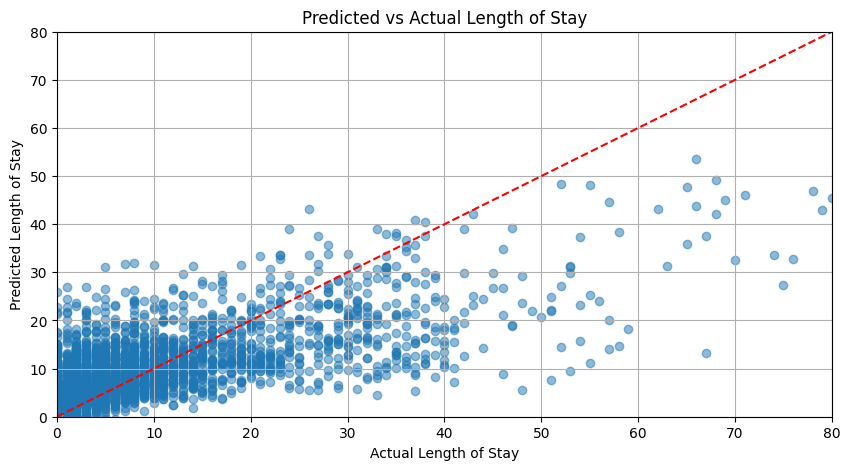

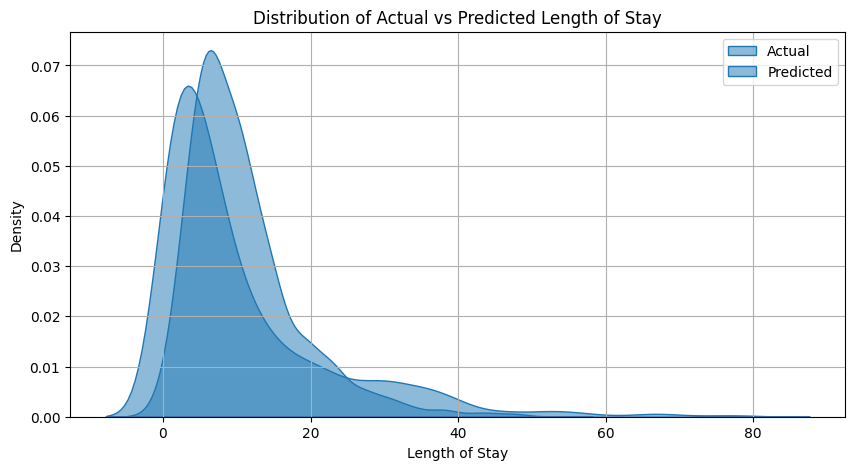

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `predictions` are the model outputs and `actuals` are the true values
# Convert tensors to numpy arrays if necessary
predictions = outputs.cpu().detach().numpy()
actuals = y_train_tensor.cpu().detach().numpy()

# 1. Predicted vs Actual Plot
plt.figure(figsize=(10, 5))
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], 'r--')  # Diagonal line
plt.title('Predicted vs Actual Length of Stay')
plt.xlabel('Actual Length of Stay')
plt.ylabel('Predicted Length of Stay')
plt.xlim([actuals.min(), actuals.max()])
plt.ylim([actuals.min(), actuals.max()])
plt.grid()
plt.show()

# 2. Distribution of Predictions and Actuals
plt.figure(figsize=(10, 5))
sns.kdeplot(actuals, label='Actual', color='blue', fill=True, alpha=0.5)
sns.kdeplot(predictions, label='Predicted', color='red', fill=True, alpha=0.5)
plt.title('Distribution of Actual vs Predicted Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()
